#CNN 숫자 이미지 예측 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf #deeplearning library #tensorflow는 신경망을 구축하고 학습시키는 데 사

In [3]:
(data_train, label_train), (data_test, label_test) = tf.keras.datasets.mnist.load_data() 
#mnist 손글씨 숫자 데이터 셋으로
#특징: 28 x 28 픽셀의 흑백 이미지로 구성된 숫자, 학습용 데이터셋: 60,000개의 이미지와 레이블, 테스트용 데이터 셋: 10,000개의 이미지와 레이블 
#date_train: 학습용 데이터 이미지 배열 , label_train: 학습용 데이터 레이블 배열 (각 이미지의 실제 숫자값)

In [4]:
data_train.shape, data_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
data=np.concatenate((data_train,data_test),axis=0)
label=np.concatenate((label_train,label_test),axis=0)
data.shape, label.shape
#np.concatenate()는 두개 이상의 배열 연결 함수 , 기본적으로 배열을 지정한 축으로 기준으로 합침
#data_train , date_test 학습용과 테스트용 데이터로 두 배열을 합쳐서 하나의 큰 배열을 만들고자 하는 목적
#axis = 0: 배열을 0번축(행방향)을 기준으로 합침 => data_train data_test 의 행을 합쳐서 새로운 배열 만듦



((70000, 28, 28), (70000,))

In [6]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(data,label,test_size=0.2)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D #kernel
from keras.layers import Flatten 
from keras.layers import MaxPooling2D #pooling

In [9]:
Cnn=Sequential()
Cnn.add(Conv2D(3, input_shape=(28,28,1), kernel_size=(3,3),padding="same", activation="relu"))
Cnn.add(MaxPooling2D(2))
Cnn.add(Flatten())
Cnn.add(Dense(200,activation="relu"))
Cnn.add(Dropout(0.2))
Cnn.add(Dense(100,activation="relu"))
Cnn.add(Dense(10,activation="softmax")) #0~9
Cnn.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"],optimizer="adam")
#오류는 Keras에서 metrics 인자가 리스트, 튜플, 또는 딕셔너리 형태여야 하는데, 문자열 ("accuracy")전달해서 발생
#해결하려면 metrics 인자를 리스트로 변경

In [10]:
Cnn.fit(train_input,train_output,epochs=5, batch_size=100)

Epoch 1/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7225 - loss: 4.8719
Epoch 2/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9151 - loss: 0.3009
Epoch 3/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9437 - loss: 0.1856
Epoch 4/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9564 - loss: 0.1402
Epoch 5/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9642 - loss: 0.1147


In [11]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [12]:
pip install opencv-python


  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
import cv2

TypeError: Image data of dtype object cannot be converted to float

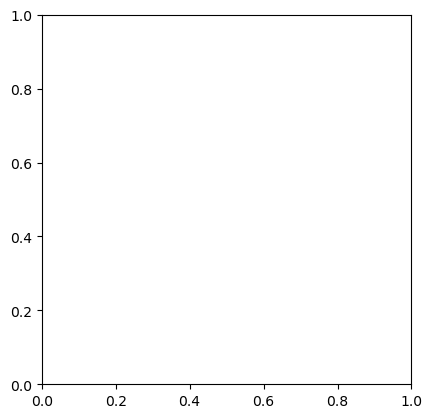

In [14]:
test=cv2.imread("/content/number_4.JPG",cv2.IMREAD_GRAYSCALE)
plt.imshow(test)

In [15]:
import cv2
import matplotlib.pyplot as plt

test = cv2.imread("/content/number_4.JPG", cv2.IMREAD_GRAYSCALE)

# 이미지가 잘 로드되었는지 확인
if test is None:
    print("이미지를 불러오지 못했습니다. 경로를 확인하세요.")
else:
    plt.imshow(test, cmap='gray')
    plt.show()


이미지를 불러오지 못했습니다. 경로를 확인하세요.


In [16]:
# Colab에서 이미지 읽기 예시
test = cv2.imread("/content/number_4.JPG", cv2.IMREAD_GRAYSCALE)

if test is None:
    print("이미지를 불러오지 못했습니다.")
else:
    plt.imshow(test, cmap='gray')
    plt.show()


이미지를 불러오지 못했습니다.


In [17]:
test = cv2.imread("number_4.jpg", cv2.IMREAD_GRAYSCALE)


In [19]:
import os
print(os.getcwd())  # 현재 작업 디렉토리 확인


C:\Users\used3


In [23]:
image = cv2.imread("C:/Users/used3/number_4.jpg", cv2.IMREAD_GRAYSCALE)


In [24]:
if image is None:
    print("이미지 파일을 읽을 수 없습니다.")
else:
    # 이미지 저장
    cv2.imwrite("C:/Users/used3/number_4_saved.jpg", image)


이미지 파일을 읽을 수 없습니다.


In [26]:
image = cv2.imread("C:\\Users\\used3\\number_4.jpg", cv2.IMREAD_GRAYSCALE)


In [27]:
import os
print(os.path.isfile("C:/Users/used3/number_4.jpg"))


False


In [28]:
image = cv2.imread("C:/Users/used3/Desktop/number_4.jpg", cv2.IMREAD_GRAYSCALE)


In [30]:
# 바탕화면 경로에 주피터 노트북 파일 저장
import os

# 바탕화면 경로 지정
desktop_path = "C:/Users/used3/Desktop/"

# 파일명 지정
file_name = "my_notebook.ipynb"

# 바탕화면에 저장
file_path = os.path.join(desktop_path, file_name)

# 파일 저장
with open(file_path, "w") as f:
    f.write("주피터 노트북 내용을 여기에 저장")


In [32]:
import os

# 현재 작업 중인 디렉터리 경로 확인
current_directory = os.getcwd()
print(current_directory)


C:\Users\used3


In [35]:
cd

C:\Users\used3


In [36]:
import os
# 현재 작업 중인 디렉터리 경로 확인
current_directory = os.getcwd()
print(current_directory)


C:\Users\used3


In [37]:
import os

# 바탕화면 경로 설정
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")

# 바탕화면 경로에서 파일 읽기
image = cv2.imread(os.path.join(desktop_path, "number_4.jpg"), cv2.IMREAD_GRAYSCALE)

# 이미지 저장
cv2.imwrite(os.path.join(desktop_path, "number_4_saved.jpg"), image)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [38]:
import os
import cv2

# 바탕화면 경로 설정
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")

# 이미지 파일 경로 설정
image_path = os.path.join(desktop_path, "number_4.jpg")

# 이미지 읽기
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 이미지가 제대로 읽혔는지 확인
if image is None:
    print(f"이미지 파일을 읽을 수 없습니다. 경로를 확인해 주세요: {image_path}")
else:
    # 이미지 저장
    save_path = os.path.join(desktop_path, "number_4_saved.jpg")
    cv2.imwrite(save_path, image)
    print(f"이미지가 저장되었습니다: {save_path}")


이미지 파일을 읽을 수 없습니다. 경로를 확인해 주세요: C:\Users\used3\Desktop\number_4.jpg


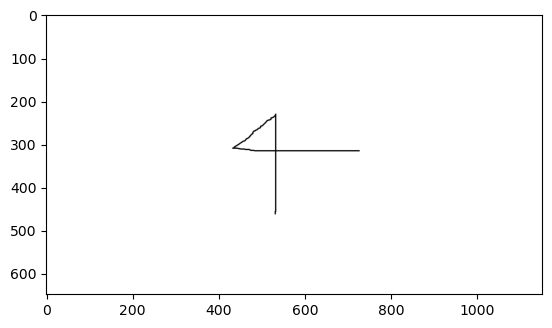

In [40]:
import cv2
import matplotlib.pyplot as plt

# 이미지 경로 설정
image_path = "C:/Users/used3/Desktop/number_4.JPG"

# 이미지 읽기 (흑백으로)
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 이미지가 제대로 읽혔는지 확인
if image is None:
    print(f"이미지 파일을 읽을 수 없습니다. 경로를 확인해 주세요: {image_path}")
else:
    # 이미지를 표시
    plt.imshow(image, cmap='gray')
    plt.show()


TypeError: Image data of dtype object cannot be converted to float

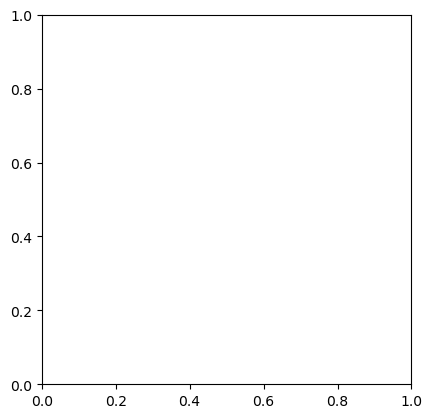

In [41]:
test=cv2.imread("/content/number_4.JPG",cv2.IMREAD_GRAYSCALE)
plt.imshow(test) #/content/number_4.JPG 이 경로는 Google Colab과 같은 클라우드 환경에서 사용되는 경로로 
#로컬 환경에서 주피터 노트북을 실행하는 경우, 경로는 컴퓨터 파일의 시스템을 기준으로 설정해야 

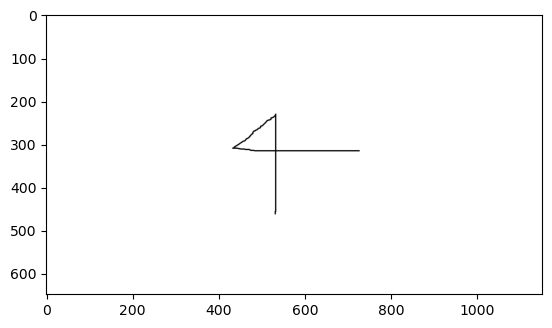

In [42]:
import os
image_path = "C:/Users/used3/Desktop/number_4.JPG"
if os.path.exists(image_path):
    test = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(test, cmap='gray')
    plt.show()
else:
    print(f"이미지 파일을 찾을 수 없습니다: {image_path}")
#/content/와 같은 클라우드 경로를 사용하면 이미지를 찾을 수 없음 따라서 로컬 경로를 제대로 설정하여 이미지를  불러와야 됨

In [43]:
test
#변수에서 나온 출력은 이미지 데이터를 나타내는 2D 배열
#dtype=uint8: uint8은 8비트 부호 없는 정수. 값은 0부터 255까지의 정수만 표현 가능
#이미지를 그레이스케일(흑백)로 읽을 경우, 각 픽셀의 색상 값은 0에서 255 사이의 값으로 표현. 
#0은 검은색, 255는 흰색, 그 사이의 값은 회색으로 표현됩니다.

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [44]:
test_BW=255-test

In [45]:
test_BW.shape
#배열의 형태(shape) 확인 코드 
#shape 배열이나 행렬의 차원과 크기. 주로 NumPy 배열이나 OpenCV 이미지에서 사용
#이미지는 총 648 x 1152 = 747,456개의 픽셀

(648, 1152)

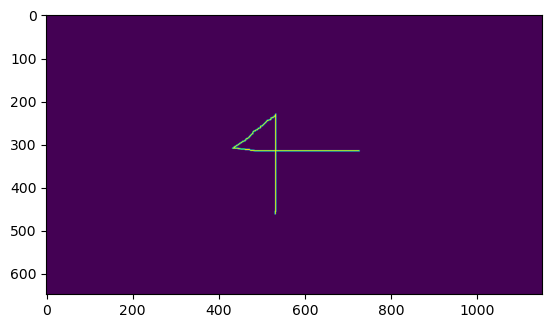

In [46]:
plt.imshow(test_BW)

In [47]:
test_BW_size=cv2.resize(test_BW,(28,28))
test_BW_size.shape

(28, 28)

In [48]:
Cnn.predict(test_BW_size)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1_1/Cast:0", shape=(28, 28), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(28, 28), dtype=uint8)
  • training=False
  • mask=None

In [49]:
test_BW_size_re=test_BW_size.reshape(1,28,28)
test_BW_size_re.shape

(1, 28, 28)

In [50]:
Cnn.predict(test_BW_size_re)
#가장 큰 값은 0.45194733이고, 클래스 5에 해당
#이 값이 다른 값들보다 훨씬 크므로, 모델은 클래스 5를 가장 유력한 예측 결과로 선택.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


array([[0.00530538, 0.12690704, 0.00515692, 0.21623026, 0.03403914,
        0.45194733, 0.01668097, 0.0495579 , 0.01350945, 0.08066554]],
      dtype=float32)

In [51]:
np.argmax(Cnn.predict(test_BW_size_re))
#Cnn.predict(test_BW_size_re):학습된 신경망 모델(cnn), test_BW_size_re: 예측에 사용할 테스트 데이터(이미지 배열)
#Cnn.predict(): 테스트 데이터를 신경망 모델에 넣고 예측 결과를 반환
#np.argmax(): 주어진 배열에서 가장 큰 값의 인덱스를 반환하는 numpy 함수 
#np.argmax()를 사용하여 클래스 5를 반환=> 해당 예측의 결과는 클래스 5에 속하는 것이라고 해석

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


5